## Load Our Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
full_df = housing.frame


In [5]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [6]:
full_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [7]:
full_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

**No Null Values**

In [8]:
full_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

**This is not very useful as there is too much information, Instead we will use
 correlation matrix and a box plot to get what we need**

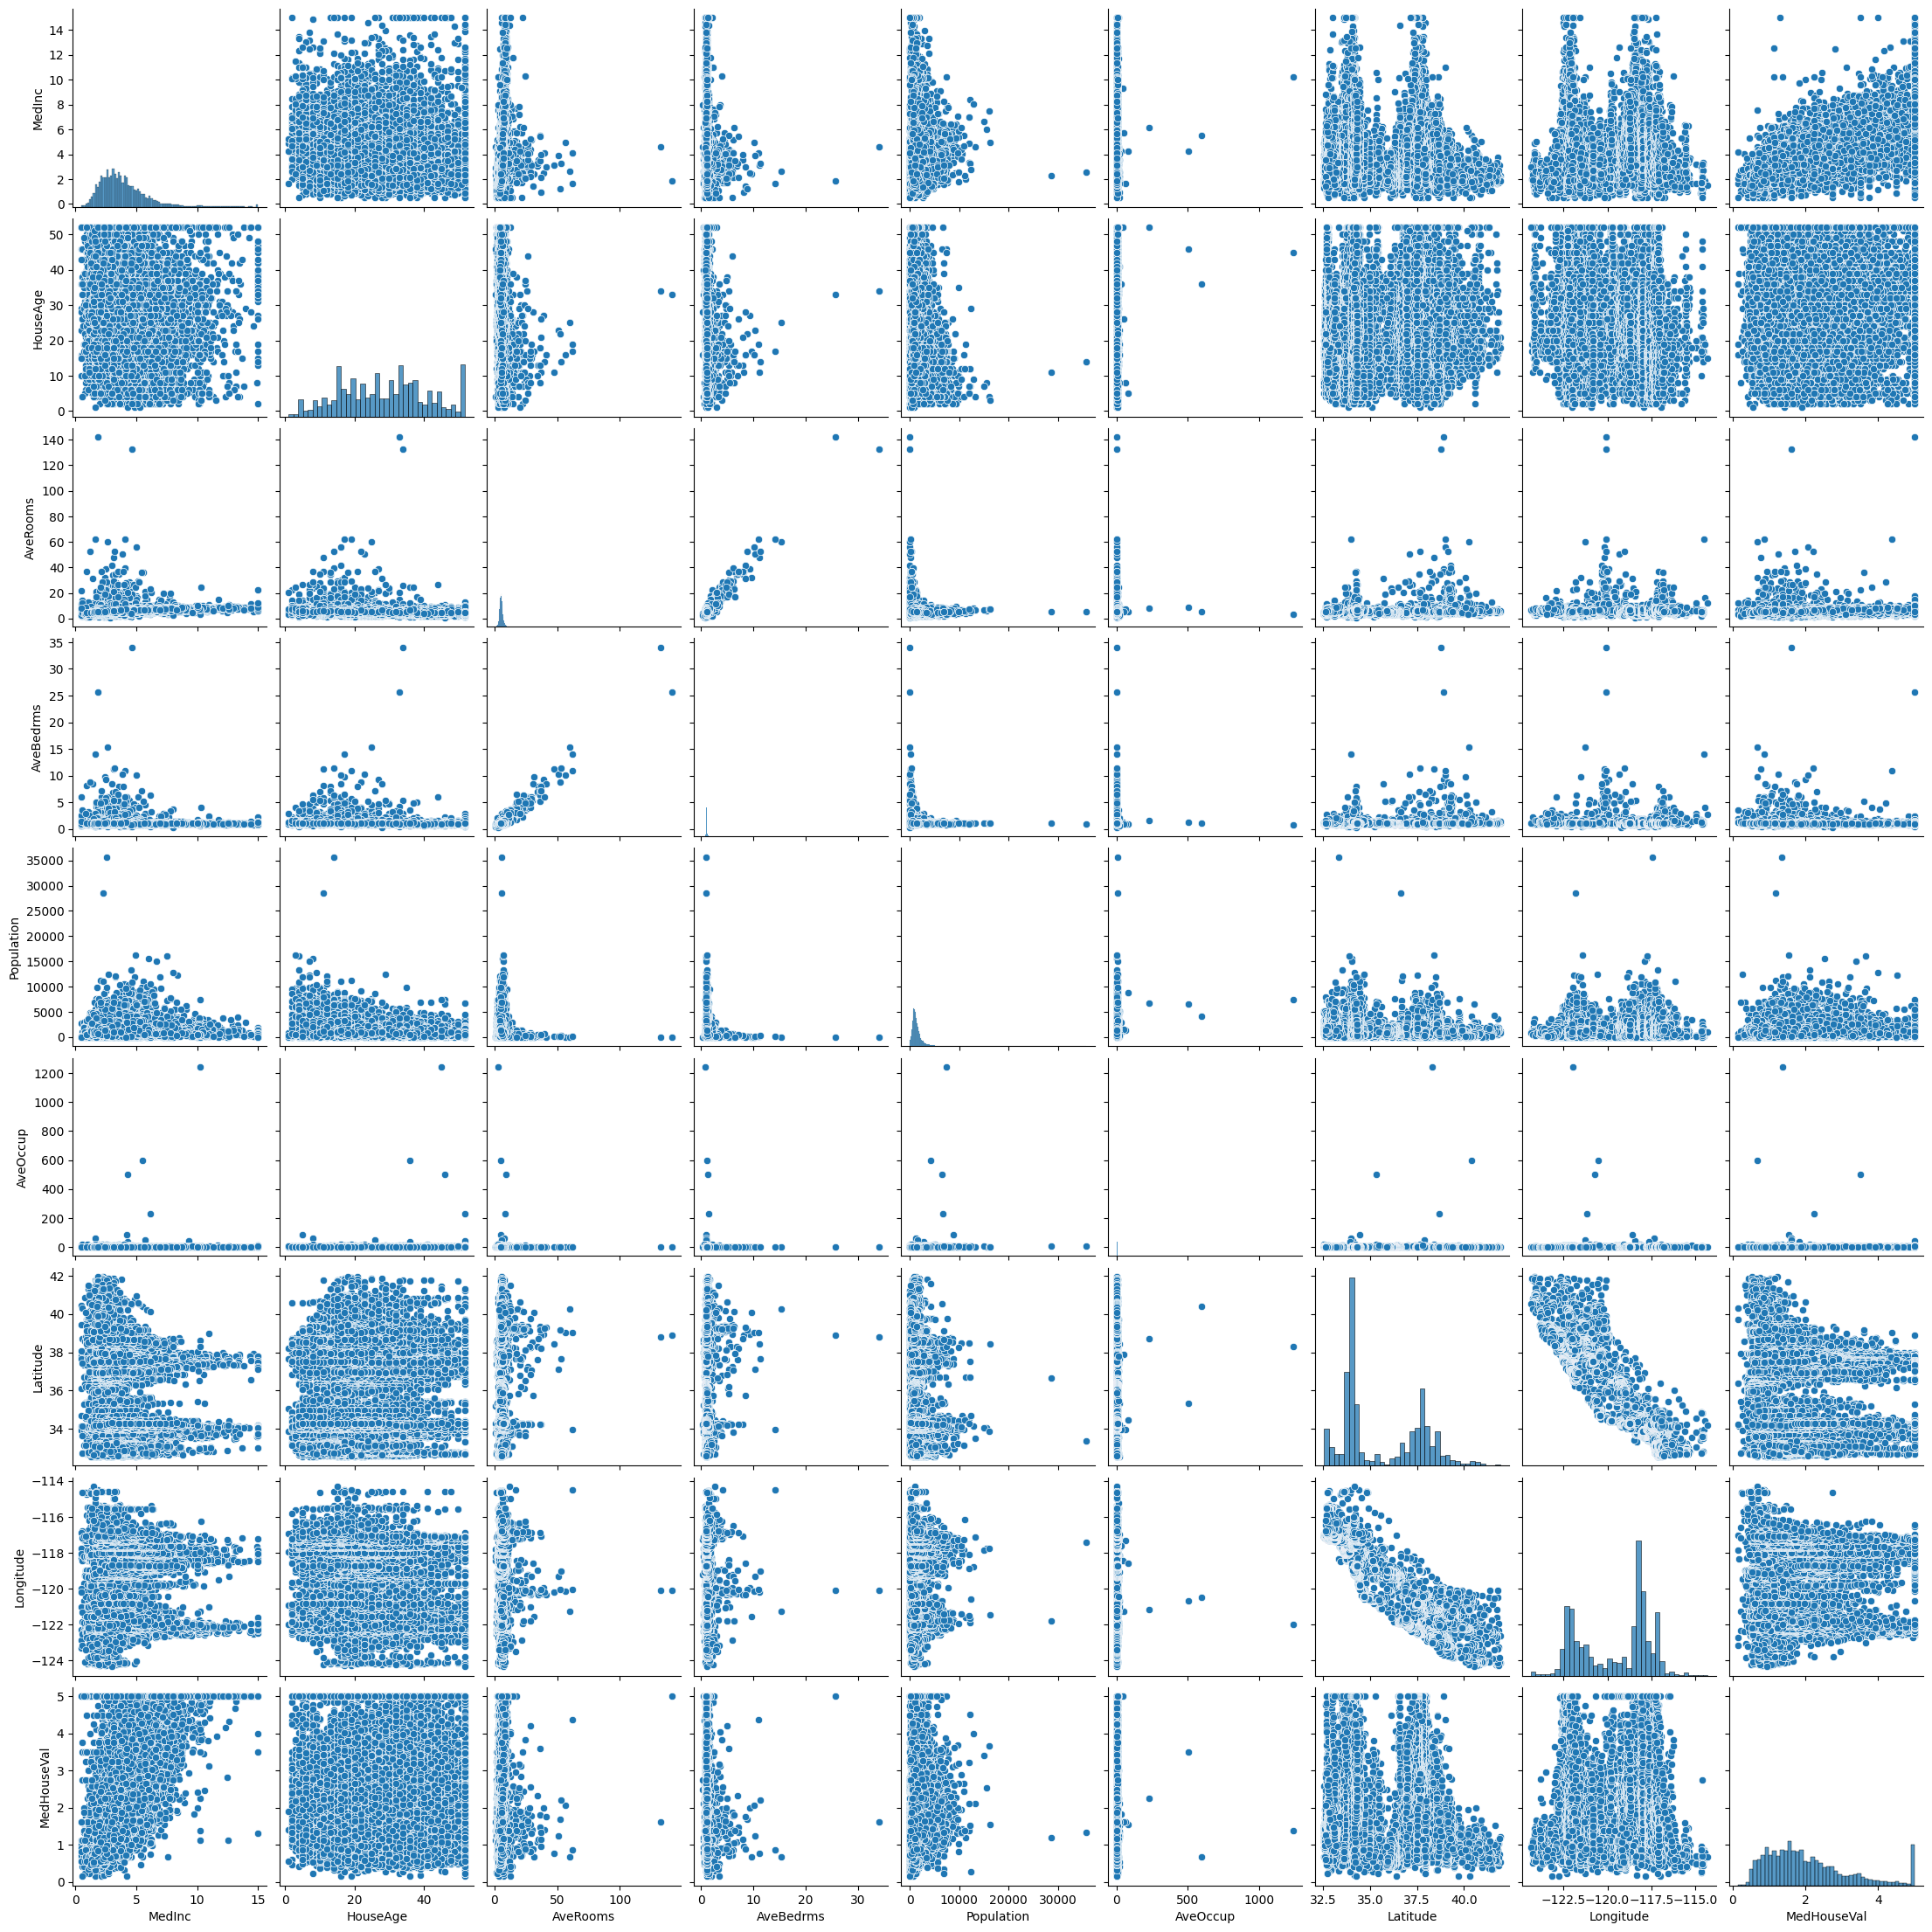

In [9]:
import seaborn as sns
sns.pairplot(full_df)

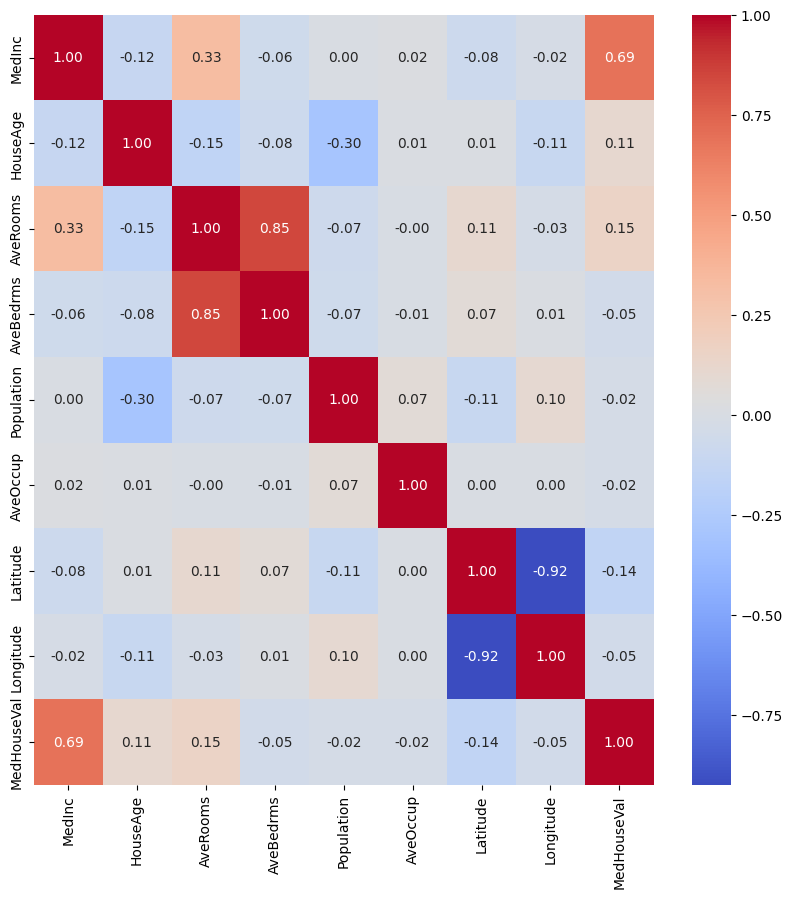

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = full_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


From the above heatmap of correlation matrix , We can extract several important insights


1.   Median Income has the highest correlation with Median House Value (0.65)
2.   High correlation between Number of room and number of bedrooms logically
3.   Latitude has abit more correlation (negatively) with House Value



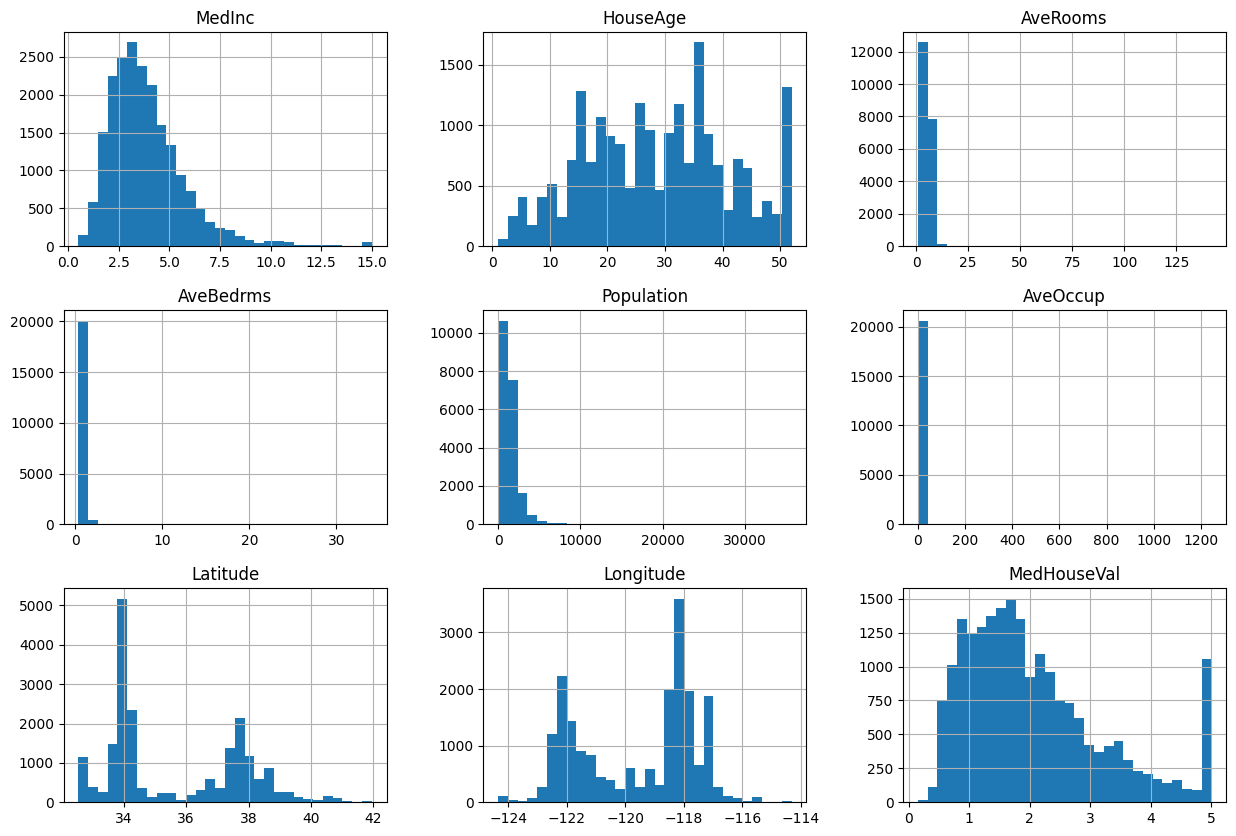

In [11]:
full_df.hist(bins=30, figsize=(15, 10))
plt.show()


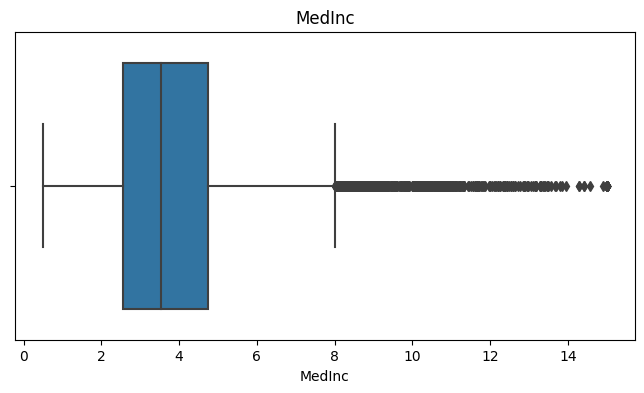

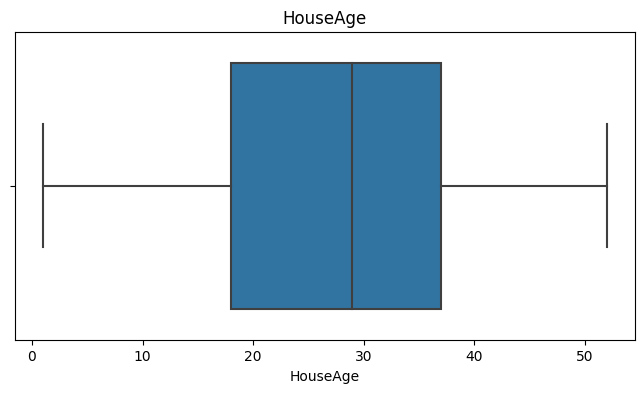

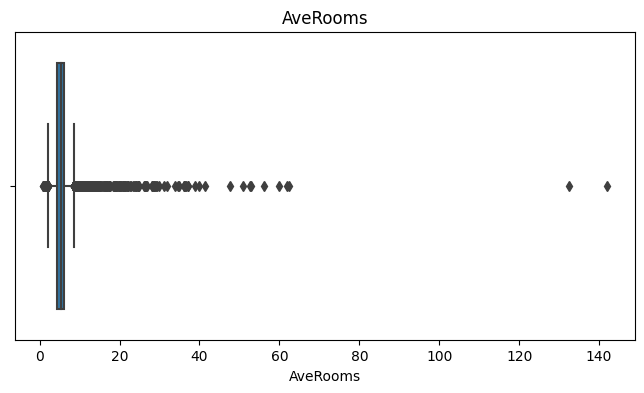

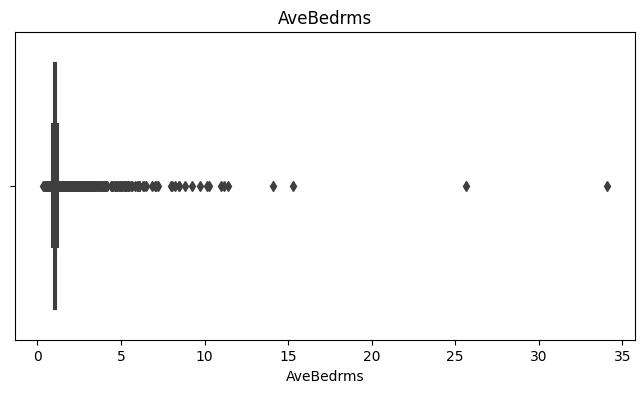

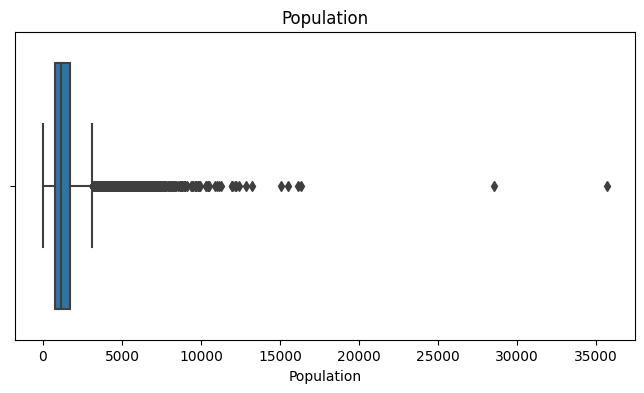

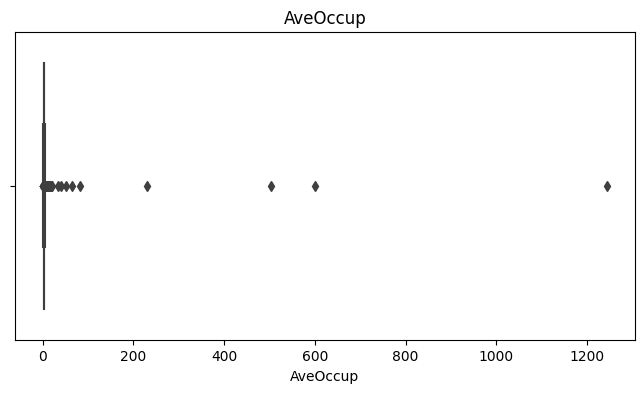

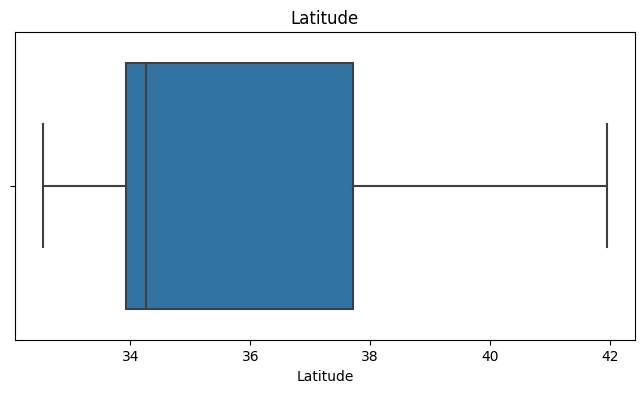

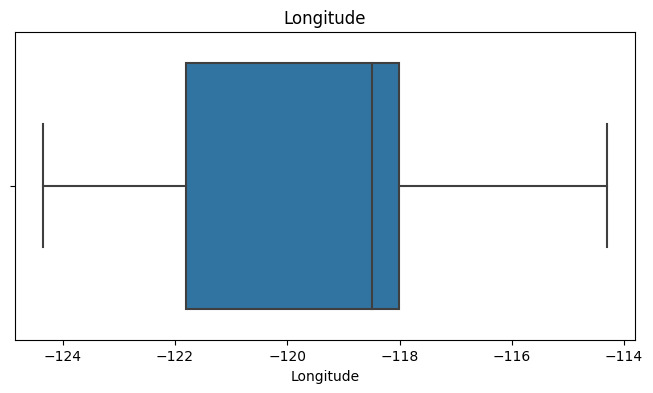

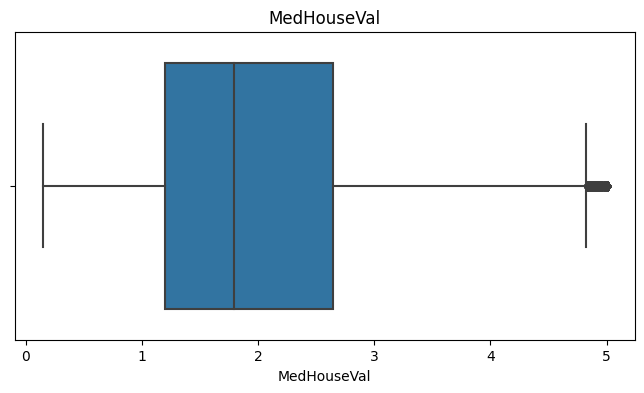

In [12]:
for column in full_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=full_df[column])
    plt.title(column)
    plt.show()


We can observe from above the presence of sever outliers in AVg rooms and Avg bedrooms, needs to be investigated/

In [13]:
import numpy as np
# Define a function to detect outliers based on the IQR
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] > upper_bound)]
    return outliers
def detect_outliers_std(dataframe, column, num_std=3):
    mean = dataframe[column].mean()
    std_dev = dataframe[column].std()
    outliers_mask = (np.abs(dataframe[column] - mean) > (num_std * std_dev))
    return dataframe[outliers_mask]


In [14]:
rooms_outliers_df = detect_outliers_iqr(full_df,"AveRooms")
bedrooms_outliers_df = detect_outliers_iqr(full_df,"AveBedrms")

In [15]:
import pandas as pd
outliers_both = pd.merge(rooms_outliers_df, bedrooms_outliers_df, how='inner')
outliers_both





MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    2.4196      26.0   8.518248   2.700730       253.0  1.846715     37.68   
1    2.4500      17.0   8.973684   1.855263       338.0  2.223684     38.69   
2    2.2417      15.0  10.515306   2.372449       573.0  2.923469     38.72   
3    3.1500      16.0  29.852941   5.323529       202.0  1.980392     38.52   
4    3.4609      14.0   8.625304   1.708029       946.0  2.301703     38.48   
..      ...       ...        ...        ...         ...       ...       ...   
323  2.0625      37.0  24.669118   4.897059       338.0  2.485294     38.12   
324  2.1250      26.0  37.063492   7.185185       416.0  2.201058     38.19   
325  3.2589       9.0  11.458508   2.056161      2811.0  2.356245     37.84   
326  4.0833      18.0  11.536585   2.804878        88.0  2.146341     37.85   
327  3.4861      17.0  17.300000   6.500000        51.0  2.550000     37.94   

     Longitude  MedHouseVal  
0      -122.08        2.750  
1      -119.78        1.176  
2      -119.93        0.979  
3      -120.00        1.406  
4      -120.56        1.209  
..         ...          ...  
323    -120.12        0.889  
324    -120.03        1.325  
325    -120.20        1.379  
326    -119.93        1.375  
327    -119.57        1.375  

[328 rows x 9 columns]

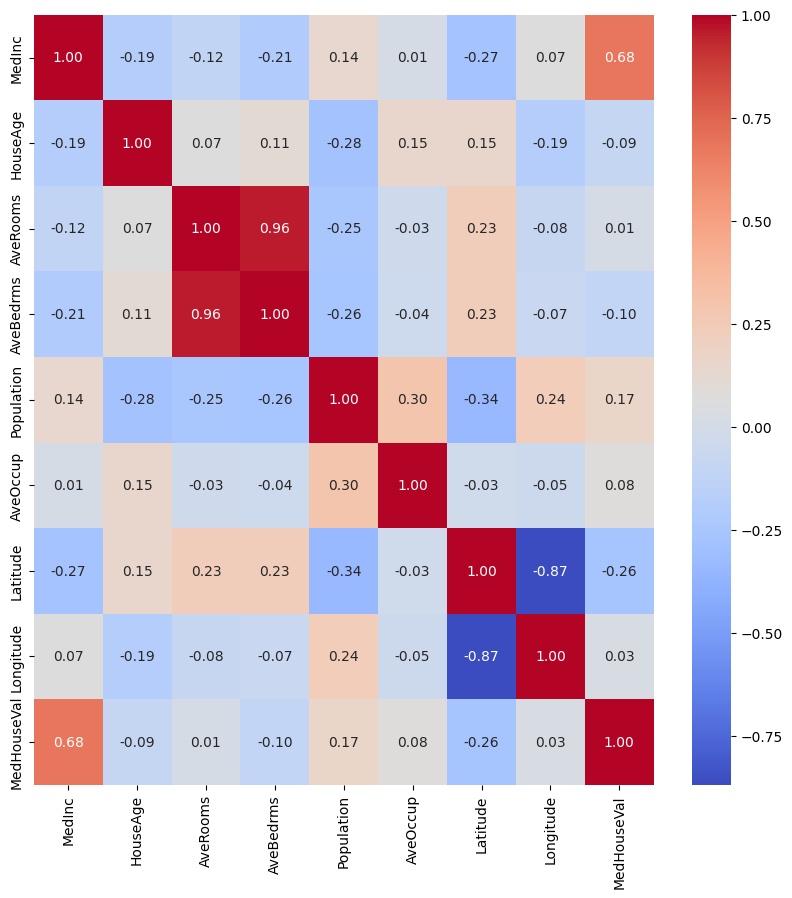

In [16]:

outlier_corr = outliers_both.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(outlier_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

It seems to me that these might potentially be hotels/dorms which is why they such a high number of rooms

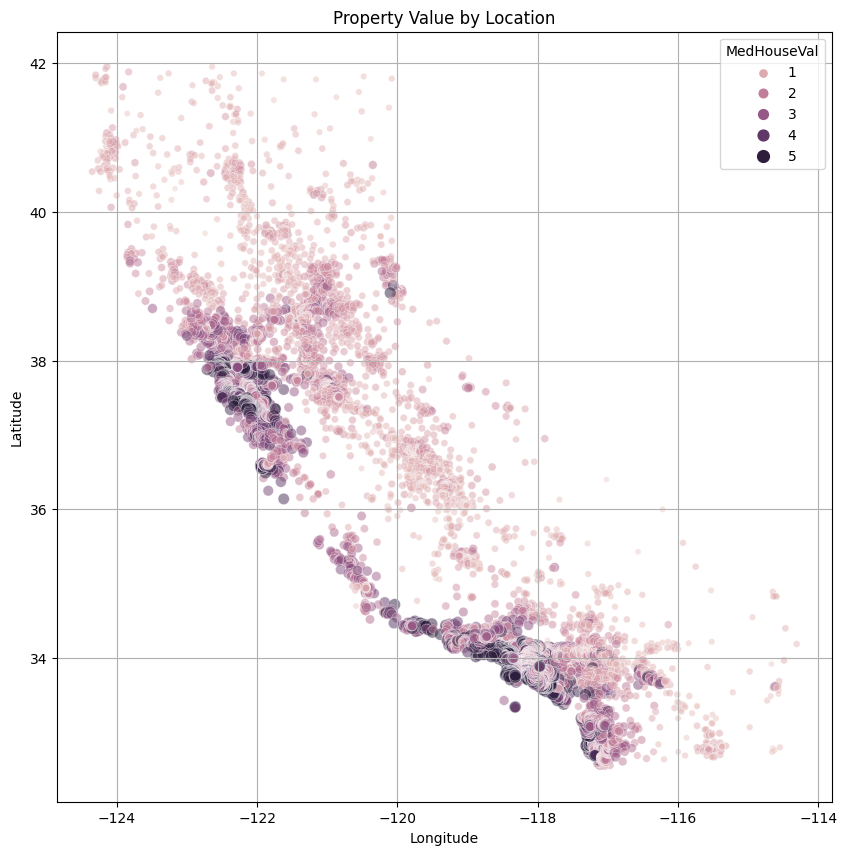

In [17]:
#Plotting to visualize cali map
plt.figure(figsize=(10, 10))
sns.scatterplot(data=full_df, x='Longitude', y='Latitude', size='MedHouseVal', hue='MedHouseVal', alpha=0.5)
plt.title('Property Value by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [18]:
import folium

# Create a map object centered around the median Latitude and Longitude of your dataset
m = folium.Map(location=[full_df['Latitude'].median(), full_df['Longitude'].median()], zoom_start=6)

# Since Full_df is not too large, we iterate through the DataFrame and add each point to the map
for idx, row in full_df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=row['MedHouseVal']/100000, # Scale the property value for the circle size
                        popup=f"Value: ${row['MedHouseVal']*100000:.2f}",
                        color='blue',
                        fill=True,
                        fill_color='blue'
                       ).add_to(m)

# Show the map
m.save('map.html')


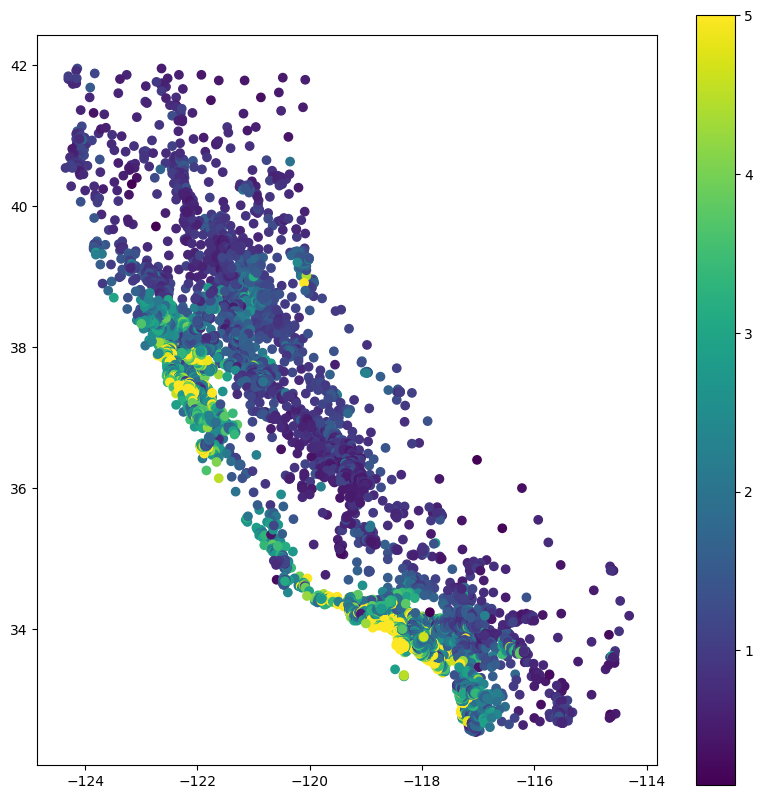

In [19]:
import geopandas as gpd
from shapely.geometry import Point


# First, we convert the DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(full_df, geometry=gpd.points_from_xy(full_df.Longitude, full_df.Latitude))

# We then set the coordinate reference system (CRS) for our GeoDataFrame
gdf.set_crs(epsg=4326, inplace=True)

# Now, let's plot the data using GeoPandas built-in plot method
# We can use the 'MedHouseVal' column to color-code the points
gdf.plot(column='MedHouseVal', cmap='viridis', legend=True, figsize=(10, 10))

# To show the plot
plt.show()



1.   Higher Value properties alogn the coast (Bay area, LA)
2.   Properly value seems to decrease as you move inland
3. Rural vs urban, Urban is alot more dense.
4. Northern Cali has some higher propery regions, Scacramento and San Fransisco






**I WILL try building a quick Baseline Model before changing our data WITHOUT SCALING**

In [20]:
##This one is using Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define your features and target variable
X = full_df.drop('MedHouseVal', axis=1)
y = full_df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


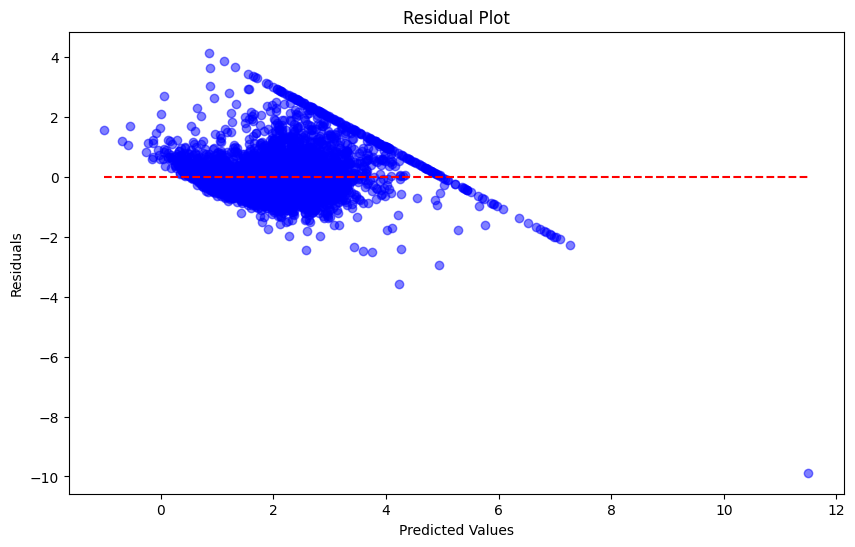

In [21]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [22]:
## I would like to use statsmodels to get more model summary
import statsmodels.api as sm

def linear_regression_stats(X, y):
    # Add a constant to the model (the intercept term)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Return the summary of the model
    return model.summary()

# Assuming X and y are already defined:
# X - your features
# y - your target variable
print(linear_regression_stats(X, y))


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:46:53   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [23]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


In [25]:
print(linear_regression_stats(X_train_scaled, y_train))

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:46:53   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.006    369.848      0.0

## Perhaps we can chance lat/long to One categorical feature

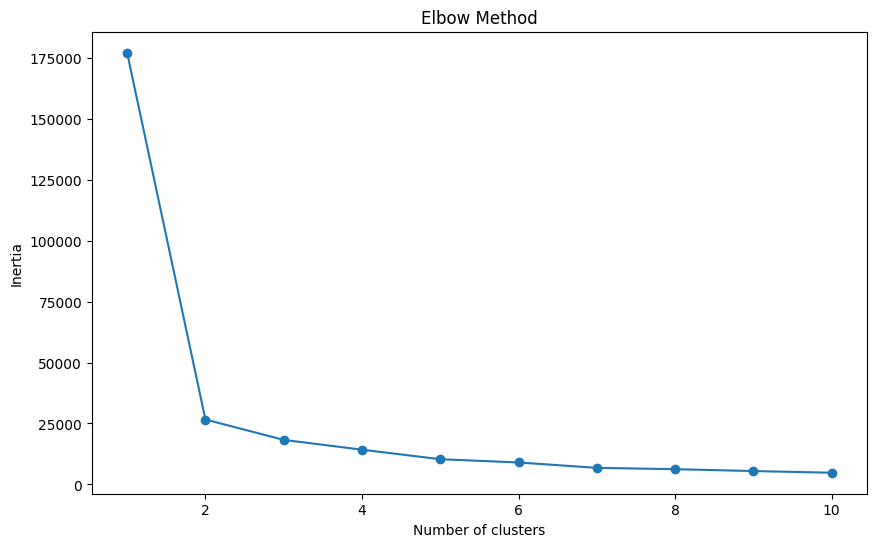

In [31]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'df' is your main DataFrame and it contains 'Latitude' and 'Longitude' columns
# Isolate the geographical data for clustering
geo_data = full_df[['Latitude', 'Longitude']]

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_init='auto',n_clusters=i, random_state=42).fit(geo_data)
    inertia.append(kmeans.inertia_)

# Plot the inertia to see the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
optimal_clusters = 2  # Extracted from Elbow Method

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(geo_data)

# Assign the cluster labels to the original DataFrame
full_df['Geo_Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Longitude', ylabel='Latitude'>

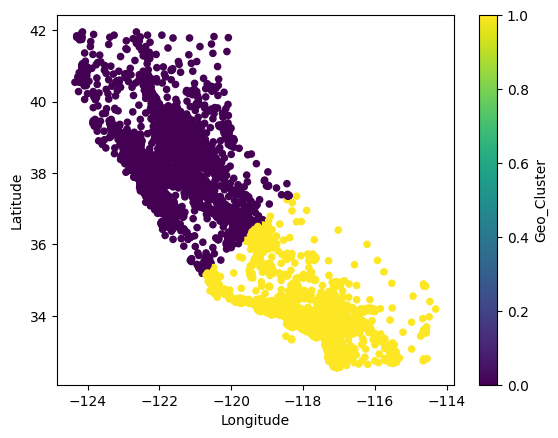

In [30]:
full_df.plot.scatter(x='Longitude',y="Latitude",c='Geo_Cluster',cmap="viridis")

##Experimenting with Adding Population before clustering

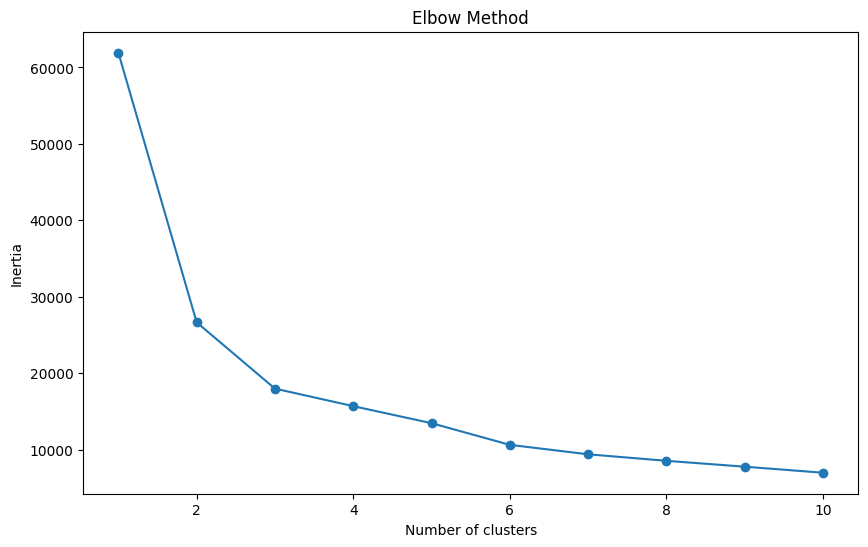

In [37]:
# Assuming 'Population' is a column in your DataFrame
geo_data_with_pop = full_df[['Latitude', 'Longitude', 'Population']]

# Scale the features
scaler = StandardScaler()
geo_data_with_pop_scaled = scaler.fit_transform(geo_data_with_pop)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_init='auto',n_clusters=i).fit(geo_data_with_pop_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia to see the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [43]:
optimal_clusters = 2  # Extracted from Elbow Method

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_init="auto",n_clusters=optimal_clusters, random_state=42).fit(geo_data_with_pop)

# Assign the cluster labels to the original DataFrame
full_df['Geo_Cluster_with_pop'] = kmeans.labels_

<Axes: xlabel='Longitude', ylabel='Latitude'>

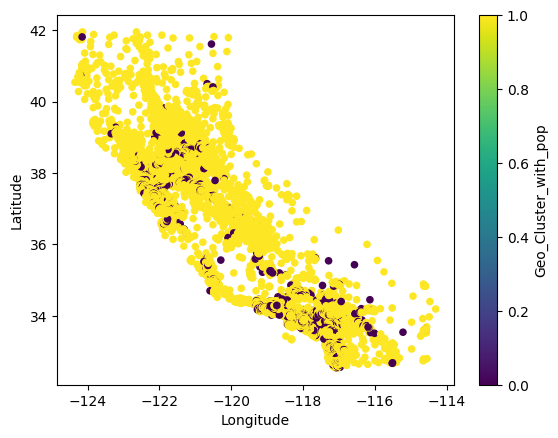

In [44]:
full_df.plot.scatter(x='Longitude',y="Latitude",c='Geo_Cluster_with_pop',cmap="viridis")

# **Not sure yet about involving these Clusters**
I will not work on adding new features that make sense logically.
1. RoomsPerBedroom
2. PopulationPerHousehold
3. Income Per Capita
4. BinHouseAge?



In [75]:
df = full_df.drop(columns=["Geo_Cluster_DBSCAN","Geo_Cluster_with_pop","Geo_Cluster"])
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [76]:
df['Rooms_Per_Bedroom'] = df['AveRooms'] / df['AveBedrms']
df['Pop_Per_Household'] = df['Population'] / df['AveOccup']
df['Income_Per_Capita'] = df['MedInc'] / df['AveOccup']
df['Diag_CO'] = df['Latitude'] + df['Longitude']

df['HouseAgeCat'] = pd.cut(df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=[1, 2, 3, 4, 5, 6])

df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  Rooms_Per_Bedroom  Pop_Per_Household  \
0        -122.23        4.526           6.821705              126.0   
1        -122.22        3.585           6.418626             1138.0   
2        -122.24        3.521           7.721053              177.0   
3        -122.25        3.413           5.421277              219.0   
4        -122.25        3.422           5.810714              259.0   
...          ...          ...                ...                ...   
20635    -121.09        0.781           4.451872              330.0   
20636    -121.21        0.771           4.646667              114.0   
20637    -121.22        0.923           4.647423              433.0   
20638    -121.32        0.847           4.547677              349.0   
20639    -121.24        0.894           4.521104              530.0   

       Income_Per_Capita  Diag_CO HouseAgeCat  
0               3.257687   -84.35           5  
1               3.934608   -84.36           3  
2               2.589838   -84.39           6  
3               2.214765   -84.40           6  
4               1.763125   -84.40           6  
...                  ...      ...         ...  
20635           0.609348   -81.61           3  
20636           0.818751   -81.72           2  
20637           0.730983   -81.79           2  
20638           0.879423   -81.89           2  
20639           0.912731   -81.87           2  

[20640 rows x 14 columns]

In [77]:
added_features = df.loc[:,"Rooms_Per_Bedroom":]
added_features

Rooms_Per_Bedroom  Pop_Per_Household  Income_Per_Capita  Diag_CO  \
0               6.821705              126.0           3.257687   -84.35   
1               6.418626             1138.0           3.934608   -84.36   
2               7.721053              177.0           2.589838   -84.39   
3               5.421277              219.0           2.214765   -84.40   
4               5.810714              259.0           1.763125   -84.40   
...                  ...                ...                ...      ...   
20635           4.451872              330.0           0.609348   -81.61   
20636           4.646667              114.0           0.818751   -81.72   
20637           4.647423              433.0           0.730983   -81.79   
20638           4.547677              349.0           0.879423   -81.89   
20639           4.521104              530.0           0.912731   -81.87   

      HouseAgeCat  
0               5  
1               3  
2               6  
3               6  
4               6  
...           ...  
20635           3  
20636           2  
20637           2  
20638           2  
20639           2  

[20640 rows x 5 columns]

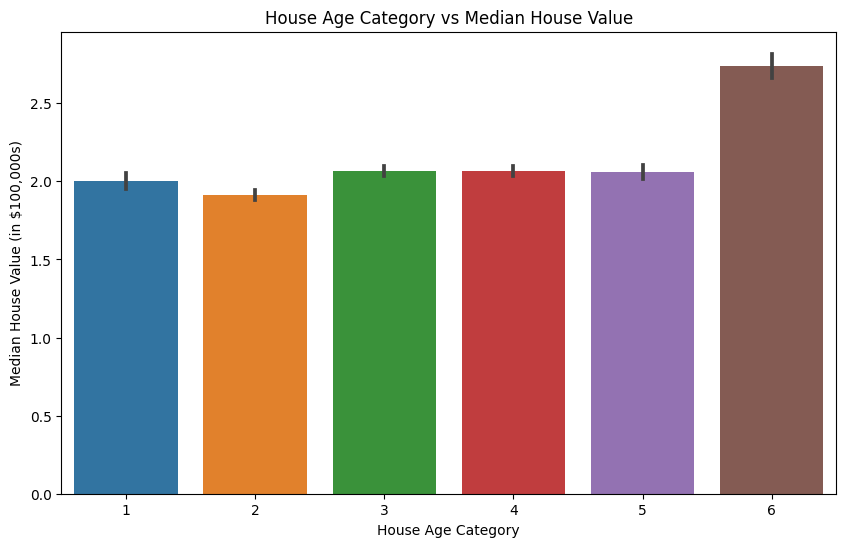

In [62]:
df['HouseAgeCat'] = df['HouseAgeCat'].astype('category')

# Bar chart for 'HouseAgeCat' vs 'MedHouseVal'
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='HouseAgeCat', y='MedHouseVal')
plt.title('House Age Category vs Median House Value')
plt.xlabel('House Age Category')
plt.ylabel('Median House Value (in $100,000s)')
plt.show()

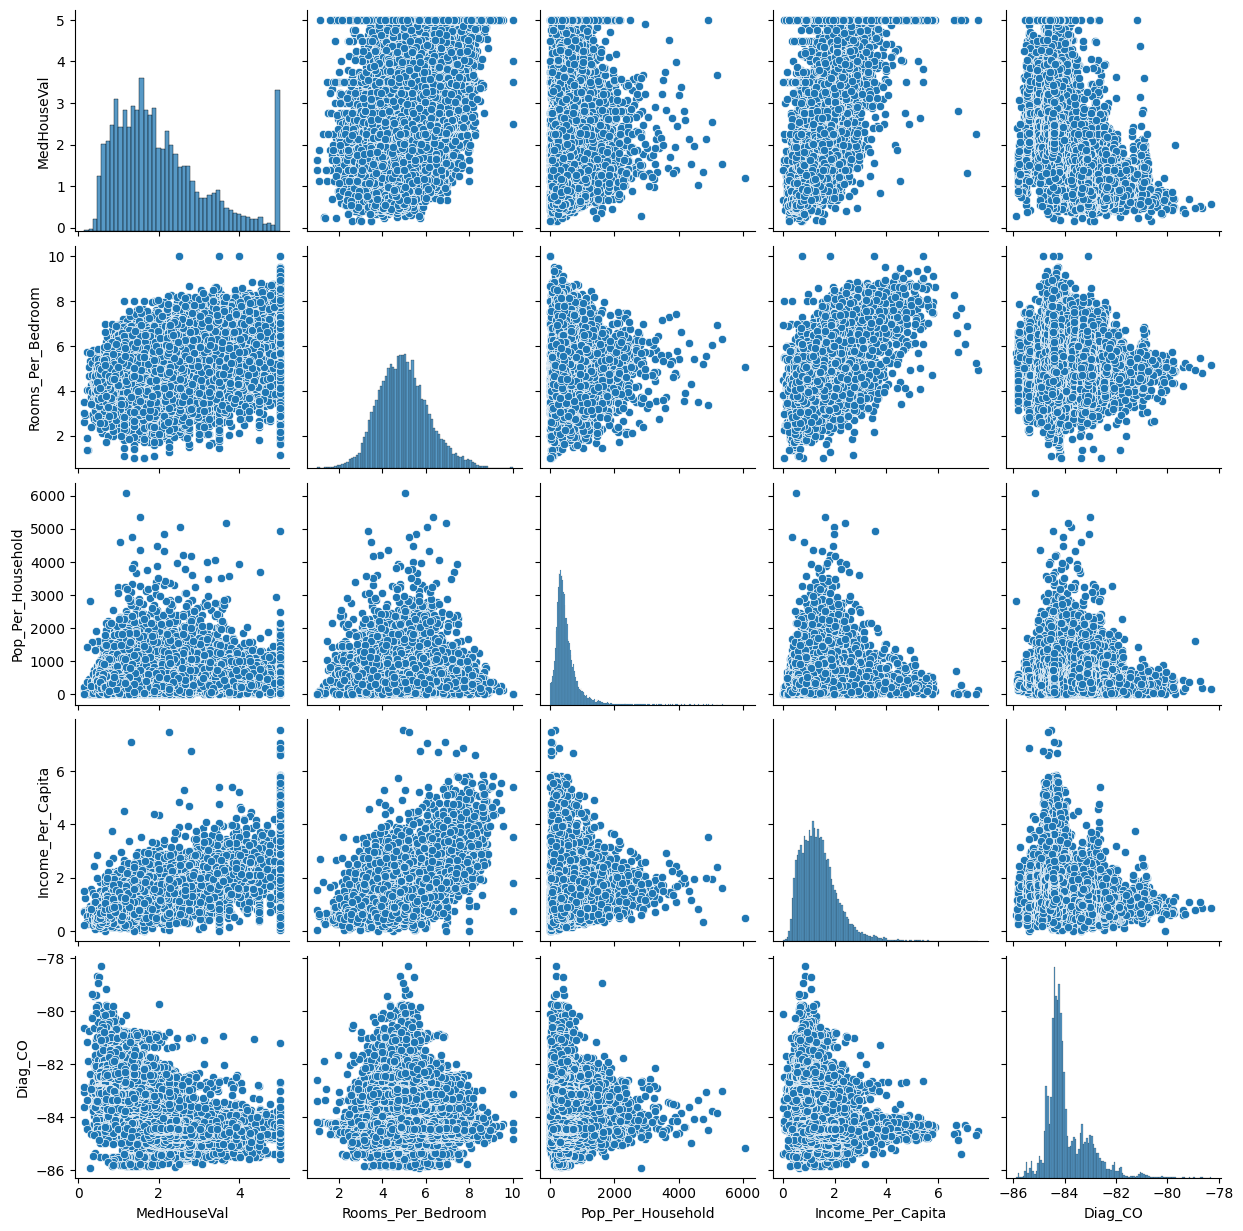

In [80]:
sns.pairplot(df.loc[:,"MedHouseVal":"Diag_CO"])

In [81]:
##This one is using Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define your features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.448111136584366
R^2 Score: 0.6580371898963078


In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.21813820264036915
R^2 Score: 0.8335342581877002


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': randint(10, 100),  # Maximum number of levels in tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 4),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,  # The base model
    param_distributions=param_dist,  # The distribution of parameters to sample from
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    random_state=42,  # Seed used by the random number generator
    n_jobs=-1  # Number of jobs to run in parallel (-1 means using all processors)
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print(f'Best parameters found: {rf_random_search.best_params_}')

# Evaluate the best model found by RandomizedSearchCV on the test set
best_rf_model = rf_random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R^2 Score: {best_r2}')



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'bootstrap': False, 'max_depth': 76, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 834}
Best Mean Squared Error: 0.2087547095806581
Best R^2 Score: 0.8406949944277002
